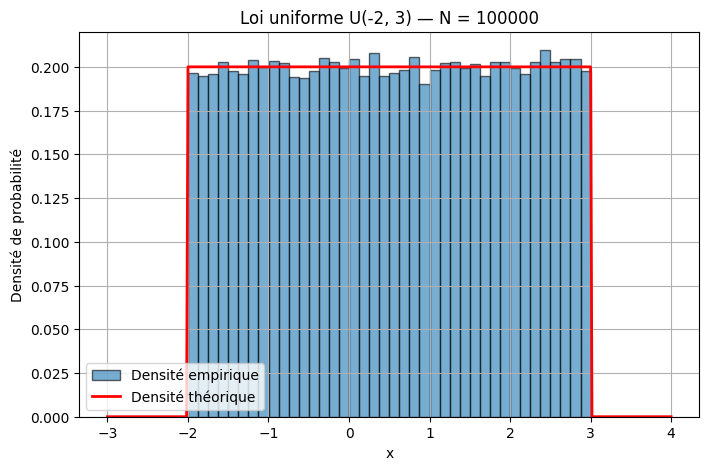

=== Loi uniforme U(a,b) ===
a = -2, b = 3, N = 100000

Moyenne empirique  : 0.50849
Moyenne théorique  : 0.50000

Écart type empirique : 1.44390
Écart type théorique : 1.44338


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Paramètres
# -----------------------------
N = 100000   # nombre de tirages
a = -2       # borne inférieure
b = 3        # borne supérieure

# -----------------------------
# Simulation de la loi uniforme (à la main)
# -----------------------------
U = np.random.rand(N)    # tirages selon U(0,1)
X = a + (b - a) * U      # transformation vers U(a,b)

# -----------------------------
# Densité théorique (sans np.where)
# -----------------------------
def densite_uniforme(x, a, b):
    """Renvoie la densité théorique f(x) = 1/(b-a) pour a <= x <= b, sinon 0."""
    f = np.zeros_like(x, dtype=float)   # initialisation à 0
    for i in range(len(x)):
        if a <= x[i] <= b:
            f[i] = 1 / (b - a)
    return f

# -----------------------------
# Histogramme empirique + densité théorique
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(X, bins=40, density=True, alpha=0.6, edgecolor='black', label="Densité empirique")

x_vals = np.linspace(a-1, b+1, 400)
f_vals = densite_uniforme(x_vals, a, b)
plt.plot(x_vals, f_vals, color='red', lw=2, label="Densité théorique")

plt.title(f"Loi uniforme U({a}, {b}) — N = {N}")
plt.xlabel("x")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Moyenne et écart-type (empiriques et théoriques)
# -----------------------------
m_emp = np.mean(X)
m_th  = (a + b) / 2

s_emp = np.std(X, ddof=0)
s_th  = (b - a) / np.sqrt(12)

# -----------------------------
# Affichage des résultats
# -----------------------------
print("=== Loi uniforme U(a,b) ===")
print(f"a = {a}, b = {b}, N = {N}")
print()
print(f"Moyenne empirique  : {m_emp:.5f}")
print(f"Moyenne théorique  : {m_th:.5f}")
print()
print(f"Écart type empirique : {s_emp:.5f}")
print(f"Écart type théorique : {s_th:.5f}")
